In [ ]:
import numpy as np
import random
import pandas as pd

In [ ]:
#Number 1
line = np.array([random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9),random.randint(0,9)])
row = np.ones(10).reshape(10,1)
result = line*row
for i in range (1,10):
  result[i] = result[i]*random.randint(0,9)
result

array([[ 4.,  5.,  0.,  6.,  1.,  1.,  0.,  9.,  0.,  8.],
       [24., 30.,  0., 36.,  6.,  6.,  0., 54.,  0., 48.],
       [20., 25.,  0., 30.,  5.,  5.,  0., 45.,  0., 40.],
       [12., 15.,  0., 18.,  3.,  3.,  0., 27.,  0., 24.],
       [16., 20.,  0., 24.,  4.,  4.,  0., 36.,  0., 32.],
       [32., 40.,  0., 48.,  8.,  8.,  0., 72.,  0., 64.],
       [ 4.,  5.,  0.,  6.,  1.,  1.,  0.,  9.,  0.,  8.],
       [36., 45.,  0., 54.,  9.,  9.,  0., 81.,  0., 72.],
       [ 8., 10.,  0., 12.,  2.,  2.,  0., 18.,  0., 16.],
       [ 8., 10.,  0., 12.,  2.,  2.,  0., 18.,  0., 16.]])

In [ ]:
#Number 2
sum = 0
for i in range (0,10):
  sum = sum+result[i,i]
sum

161.0

In [ ]:
#Number 3
movie_dict = {'name':['Star Wars','Avatar','James Bond'],
              'release_year':[1977,2009,1964]}
room_dict = {'room_num':[1,2,3],
             'capacity':[10,12,15]}
projection_dict = {'projection_id':[1,2,3],
                   'date':['12-08-2022','12-08-2022','12-09-2022'],
                   'time':[20,21,20],
                   'room_num':[1,2,3],
                   'movie_name':['Avatar','Star Wars','James Bond']}
ticket_dict = {'projection_id':[1,2,3],
               'price':[10,13,11]}
movieDF = pd.DataFrame(movie_dict)
roomDF = pd.DataFrame(room_dict)
projectionDF = pd.DataFrame(projection_dict)
ticketDF = pd.DataFrame(ticket_dict)

In [ ]:
#Number 4
result = pd.merge(roomDF,projectionDF,left_on='room_num',right_on='room_num',how='left')
resultDF = pd.merge(result,ticketDF,left_on='projection_id',right_on='projection_id',how='left')
theaterDF = pd.merge(resultDF,movieDF,left_on='movie_name',right_on='name',how='left')
occupancy = theaterDF.groupby(['room_num'])['projection_id'].count().to_frame()
occupancy.reset_index(inplace=False,drop=True)
occupancyDF = pd.merge(roomDF,occupancy,left_on='room_num',right_on='room_num',how='left')
occupancyDF = occupancyDF.rename(columns ={'room_num':'room','capacity':'capcity','projection_id':'tickets_sold'})
occupancyDF['occupancy_rate']=occupancyDF['tickets_sold']/occupancyDF['capcity']
occupancyDF.sort_values(by='occupancy_rate',ascending=False)


,room,capcity,tickets_sold,occupancy_rate
0,1,10,1,0.100000
1,2,12,1,0.083333
2,3,15,1,0.066667


In [ ]:
#Number 5
result = pd.merge(roomDF,projectionDF,left_on='room_num',right_on='room_num',how='left')
resultDF = pd.merge(result,ticketDF,left_on='projection_id',right_on='projection_id',how='left')
theaterDF = pd.merge(resultDF,movieDF,left_on='movie_name',right_on='name',how='left')
grossing = theaterDF.groupby(['name'])['price'].sum().to_frame()
grossing.sort_values(by='price',ascending=False)


,price
name,
Star Wars,13
James Bond,11
Avatar,10


In [ ]:
#Number 6
date_revenue = theaterDF.groupby(['date'])['price'].sum().to_frame()
date_revenue.sort_values(by='price',ascending=False)

,price
date,
12-08-2022,23
12-09-2022,11


In [ ]:
#Number 7
oldest_movies = theaterDF.sort_values(by='release_year',ascending=True)
oldest_movies.reset_index(inplace=True)
oldest_movies.at[0,'name']

'James Bond'

In [ ]:
#Number 8
grossing = theaterDF.groupby(['name'])['price'].mean().to_frame()
grossing.sort_values(by='price',ascending=False)

,price
name,
Star Wars,13.0
James Bond,11.0
Avatar,10.0


In [ ]:
from os import name
#Number 9
</THEATER>
  <MOVIE name = 'Avatar' release_year = '2009' >
      <PROJECTIONS projection_id = '1' date = '1282022' time = '20'>
              <TICKET> ticket_id ='1' cost ='10' </TICKET>
              <ROOM> room_num = '1' capacity = '10' </ROOM>
      </PROJECTIONS>
  </MOVIE>
  <MOVIE> name = 'Star Wars' release_year = '1977' >
              <PROJECTIONS projection_id = '1' date='1282022' time ='21'>
                    <TICKET> ticket_id ='2' cost ='12' </TICKET>
                    <ROOM> room_num = '2' capacity = '13' </ROOM>
              </PROJECTIONS>
  </MOVIE>
  <MOVIE name = 'James Bond' release_date = '1964' >
              <PROJECTIONS projection_id = '2' date='1292022' time='20'>
                  <TICKET> ticket_id = '3' cost ='11' </TICKET>
                  <ROOM> room_num = '3' capacity = '15' </ROOM>
              </PROJECTIONS>
  </MOVIE>
</THEATER>



In [ ]:
#Number 10

//THEATER/MOVIE[text()="James Bond"]/PROJECTIONS/@date

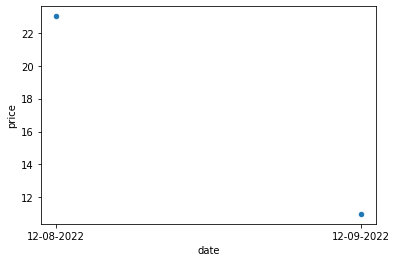

In [ ]:
#Number 11
date_revenue = theaterDF.groupby(['date'])['price'].sum().to_frame()
date_revenue.sort_values(by='price',ascending=False)
#date_revenue.plot.scatter(x=date_revenue.index,y=date_revenue['price'])
date_revenue.reset_index(inplace=True,drop=False)
date_revenue.plot.scatter('date','price')

Number 12
This should be categorized as a Yes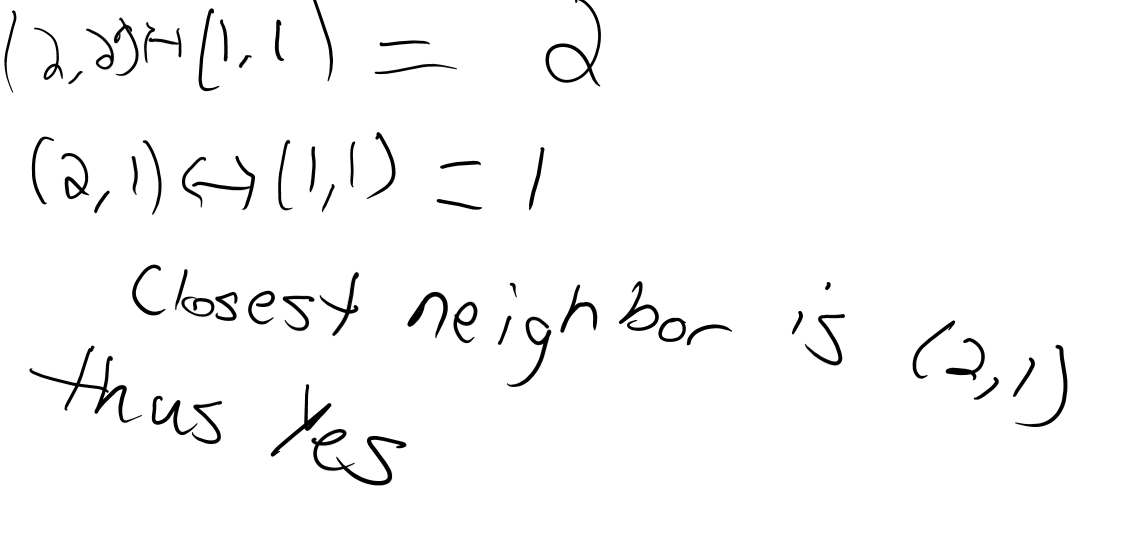